# GRADUATE ADMISSION PREDICTION

This script was initially for the kaggle task of lowest RMSE but I decided to create a flask app

## EDA

 Data has already been cleaned

In [184]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [185]:
df = pd.read_csv('Admission_Predict.csv') #Convert csv file into pandas dataframe

In [186]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [188]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [189]:
df.drop(columns='Serial No.', inplace=True)
df.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace=True)


In [190]:
df.describe(include='all')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


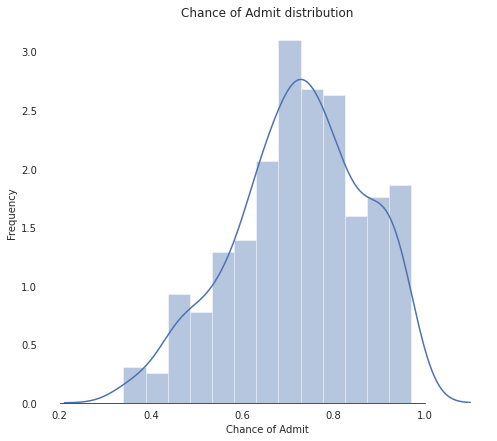

skew value:  -0.3521212864803811


In [191]:
# to check skewness of target variable 
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the distribution 
sns.distplot(df['Chance of Admit'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Chance of Admit")
ax.set(title="Chance of Admit distribution")
sns.despine(trim=True, left=True)
plt.show()

print("skew value: ", skew(df['Chance of Admit']))

In [192]:
# Transforming target variable to improve RMSE
from scipy.special import boxcox, inv_boxcox
df['Chance of Admit'] = boxcox(df['Chance of Admit'], 2.5)
print("skew value: ", skew(df['Chance of Admit']))

skew value:  0.25886070192493627


In [161]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,-0.075265
1,324,107,4,4.0,4.5,8.87,1,-0.198584
2,316,104,3,3.0,3.5,8.00,1,-0.224049
3,322,110,3,3.5,2.5,8.67,1,-0.171027
4,314,103,2,2.0,3.0,8.21,0,-0.263748


# MODEL AND PREDICTIONS

In [162]:
# Separating independent and target variables
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [163]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [164]:
y.head()

0   -0.075265
1   -0.198584
2   -0.224049
3   -0.171027
4   -0.263748
Name: Chance of Admit, dtype: float64

In [165]:
# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [166]:
#Training data for a random forest regressor
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [167]:
y_pred = reg_rf.predict(X_test)

In [168]:
reg_rf.score(X_train, y_train)

0.973090581235493

In [169]:
reg_rf.score(X_test, y_test)

0.8361752155237067

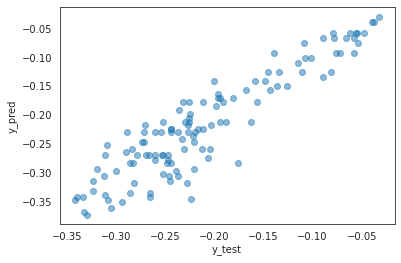

In [170]:
plt.scatter(y_pred, y_test, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [171]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2:', metrics.r2_score(y_test,y_pred))


MAE: 0.027678185216032707
MSE: 0.001307453853068212
RMSE: 0.03615873135313533
R2: 0.8361752155237067


# Transforming data back to original for model deployment using flask

In [177]:
# Transforming data back to use model for deployment using flask
df['Chance of Admit'] = inv_boxcox(df['Chance of Admit'], 2.5)

In [178]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1.612150
1,324,107,4,4.0,4.5,8.87,1,1.530944
2,316,104,3,3.0,3.5,8.00,1,1.509605
3,322,110,3,3.5,2.5,8.67,1,1.551846
4,314,103,2,2.0,3.0,8.21,0,1.471132


In [179]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [181]:
reg_rf2 = RandomForestRegressor()
reg_rf2.fit(X_train, y_train)

RandomForestRegressor()

In [182]:
import pickle

In [183]:
# Creating pickle file for flask app
file = open('grad_admissions.pkl', 'wb')
pickle.dump(reg_rf2, file)
model = open('grad_admissions.pkl', 'rb')